# Social Network Analysis

In [1]:
%matplotlib inline

from pathlib import Path
import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

##### 아래 주어진 DataFrame을 활용하여 네트워크를 만들고 그리시오.
- networkx library 활용
    - from_pandas_edge_list 함수 활용

In [2]:
# Build a dataframe that defines the edges and use to build the graph
df = pd.DataFrame([
    ("Dave", "Jenny"), ("Peter", "Jenny"), ("John", "Jenny"),
    ("Dave", "Peter"), ("Dave", "John"), ("Peter", "Sam"),
    ("Sam", "Albert"), ("Peter", "John")
], columns=['from', 'to'])
df

,from,to
0,Dave,Jenny
1,Peter,Jenny
2,John,Jenny
3,Dave,Peter
4,Dave,John
5,Peter,Sam
6,Sam,Albert
7,Peter,John


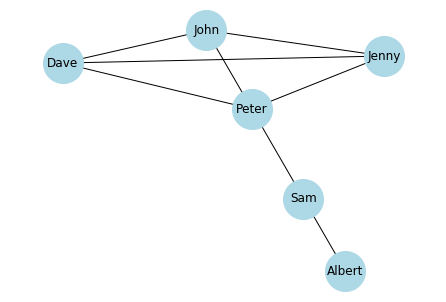

In [3]:
G = nx.from_pandas_edgelist(df, 'from', 'to')

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

##### 아래 주어진 DataFrame을 활용하여 네트워크를 만들고 그리시오.
- directed graph를 그리시오.

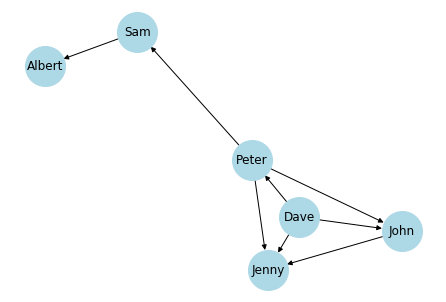

In [4]:
# generate and plot graph
# use nx.DiGraph to create a directed graph
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

##### Drug.csv 파일을 읽어오시오.

In [6]:
drug_df = pd.read_csv('./data/drug.csv')
drug_df.head()

,Entity,Related Entity,Relationship,Descrption,Related Entity Address 1,Related Entity Address 2,Related Address 3
0,6451 Babcock Road,Q & M LLC,Owner,Current Owner,10 Kings Heath,NaN,NaN
1,Q & M LLC,10 Kings Heath,Address,NaN,NaN,NaN,NaN
2,Maurico Sanchez,Q & M LLC,Managing Member,10 Kings Heath,11706 Mission Trace Street,NaN,NaN
3,Hilda Riebeling,Q & M LLC,Manager,10 Kings Heath,"1162 E Sonterra Boulevard, Suite 100",NaN,NaN
4,Ponte Vedra Apartments,Q & M LLC,Spinoff?,"8018 Broadway Street, Suite 200",NaN,NaN,NaN


##### 주어진 DataFrame을 활용하여 네트워크를 만들고 그리시오.
- networkx library 활용
    - from_pandas_edge_list 함수 활용

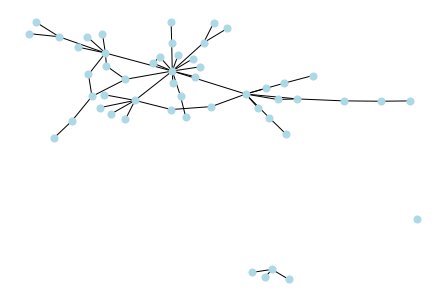

In [7]:
G = nx.from_pandas_edgelist(drug_df, 'Entity', 'Related Entity')
nx.draw(G, with_labels=False, node_color='lightblue', node_size=50)
plt.show()

##### 만든 네트워크를 중심도를 고려하여 그리시오.
- networkx library 활용
    - eigenvector_centrality 함수 활용

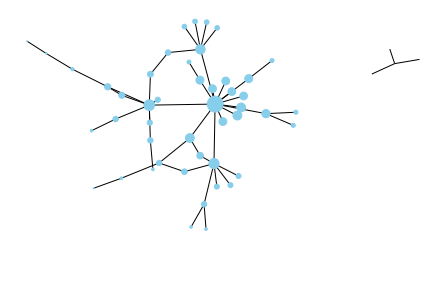

In [8]:
centrality = nx.eigenvector_centrality(G)

nx.draw(G, with_labels=False, node_color='skyblue', node_size=[400*centrality[n] for n in G.nodes()])
plt.show()

##### 처음 주어진 DataFrame을 활용하여 네트워크를 만들고 그리시오.
- circular graph 그리기
- kamada_kawai graph 그리기

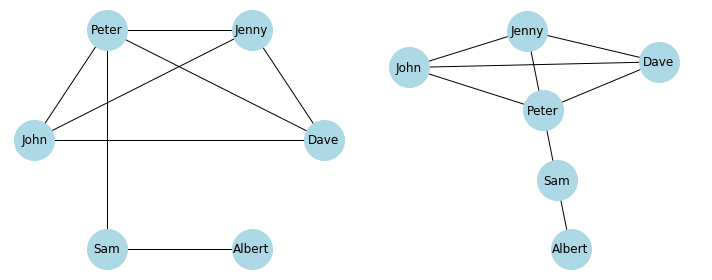

In [9]:
G = nx.from_pandas_edgelist(df, 'from', 'to')

plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(121)
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.subplot(122)
nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.tight_layout()
plt.show()

### Adjacency matrix

##### 처음 주어진 DataFrame을 활용하여 directed graph network를 만들고 연결 관계 matrix를 출력하시오.
- to_numpy_matrix 함수 활용

In [10]:
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
print(nx.to_numpy_matrix(G))

[[0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]]


##### 처음 주어진 DataFrame을 활용하여 네트워크를 만들고 각 node의 degree를 출력하시오.

In [11]:
G = nx.from_pandas_edgelist(df, 'from', 'to')
print(G.degree())

[('Dave', 3), ('Jenny', 3), ('Peter', 4), ('John', 3), ('Sam', 2), ('Albert', 1)]


##### 위 네트워크 내 각 node들의 closeness_centrality를 출력하시오.

In [12]:
print('Centrality: ')
print(nx.closeness_centrality(G))

Centrality: 
{'Dave': 0.625, 'Jenny': 0.625, 'Peter': 0.8333333333333334, 'John': 0.625, 'Sam': 0.625, 'Albert': 0.4166666666666667}


##### 위 네트워크 내 각 node들의 betweenness_centrality를 출력하시오.

In [13]:
print('Betweenness: ')
print(nx.betweenness_centrality(G, normalized=False))

Betweenness: 
{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 6.0, 'John': 0.0, 'Sam': 4.0, 'Albert': 0.0}


##### 위 네트워크 내 각 node들의 eigenvector_centrality를 출력하시오.

In [14]:
print('Eigenvector centrality: ')
print(nx.eigenvector_centrality(G, tol=1e-2))

Eigenvector centrality: 
{'Dave': 0.47246979363344, 'Jenny': 0.47246979363344, 'Peter': 0.528716197637421, 'John': 0.47246979363344, 'Sam': 0.2105222549863287, 'Albert': 0.08035200571997278}


##### 위 네트워크 내 각 node들의 중심도(eigenvector_centrality)를 고려하여 그리시오.
- kamada_kawai graph 그리기

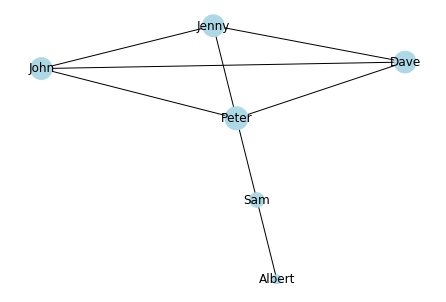

In [15]:
v = nx.eigenvector_centrality(G, tol=1e-2)

nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=[1000*v[n] for n in G.nodes()])

##### 위 네트워크 내 각 node들의 current-flow betweenness centrality를 출력하시오.

In [16]:
print(nx.current_flow_betweenness_centrality(G))

{'Dave': 0.175, 'Jenny': 0.175, 'Peter': 0.675, 'John': 0.175, 'Sam': 0.4, 'Albert': 0.0}


##### Peter 노드 근처 반경 1 내에 들어있는 노드들만 포함한 네트워크를 그리시오.
- ego_graph 함수 활용

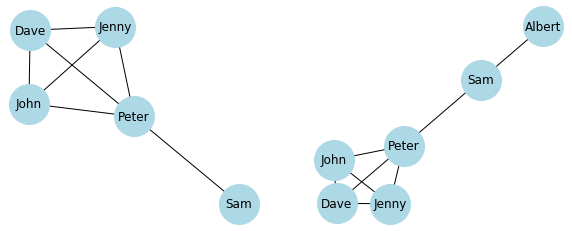

In [17]:
plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(121)
G_ego = nx.ego_graph(G, 'Peter')
nx.draw(G_ego, with_labels=True, node_color='lightblue', node_size=1600)
plt.subplot(122)
G_ego = nx.ego_graph(G, 'Peter', radius=2)
nx.draw(G_ego, with_labels=True, node_color='lightblue', node_size=1600)

##### degree 별 포함하고 있는 노드 개수를 출력하시오.

In [18]:
degreeCount = collections.Counter(d for node, d in G.degree())
degreeCount

Counter({3: 3, 4: 1, 2: 1, 1: 1})

##### 네트워크의 density를 구하시오.

In [19]:
nx.density(G)

0.5333333333333333